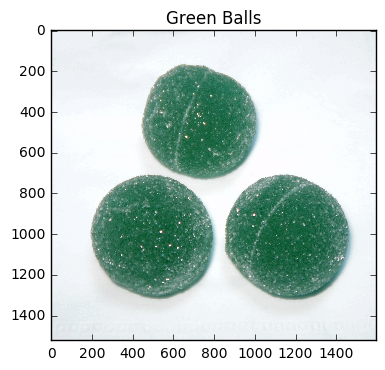

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline  

img = cv2.imread('Green_balls.jpg')
plt.imshow(img)
plt.title('Green Balls')
plt.show()

49


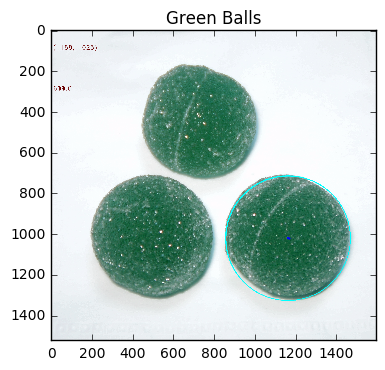

In [6]:
from collections import deque

# Modified from https://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv/

# define the lower and upper boundaries of the "green"
# ball in the HSV color space, then initialize the
# list of tracked points
greenLower = (29, 86, 6)
greenUpper = (64, 255, 255)

lenq = 10 # Maximum number of center points stored in memory

# resize the frame, blur it, and convert it to the HSV
# color space
frame = img
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
mask = cv2.erode(mask, None, iterations=1)
mask = cv2.dilate(mask, None, iterations=1)

# find contours in the mask and initialize the current
# (x, y) center of the ball
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)[-2]
center = None

pts = deque(maxlen=lenq)

# only proceed if at least one contour was found
if len(cnts) > 0:
    
    print(len(cnts))
    
    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

    # only proceed if the radius meets a minimum size
    if radius > 10:
        # draw the circle and centroid on the frame,
        # then update the list of tracked points

        cv2.circle(frame, (int(x), int(y)), int(radius),
                   (0, 255, 255), 2)
        cv2.circle(frame, center, 5, (0, 0, 255), -1)
        cv2.putText(frame, str(center), (10, 100), cv2.FONT_HERSHEY_DUPLEX, 1, cv2.COLOR_YUV420sp2GRAY)
        cv2.putText(frame, str(round(radius*2,0)), (10, 300), cv2.FONT_HERSHEY_DUPLEX, 1, cv2.COLOR_YUV420sp2GRAY)

# update the points queue
pts.appendleft(center)

plt.imshow(frame)
plt.title('Green Balls')
plt.show()